In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data['S_cor'] = data['f_cor'].values
data['S_inc'] = data['f_inc'].values

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc
0,10,1,1,61,52,4,3,1,1.285418,0,61,52
1,10,1,2,54,37,4,2,1,1.577622,0,54,37
2,10,1,3,51,51,4,3,2,1.564731,0,51,51
3,10,1,4,50,35,3,1,2,1.217245,1,50,35
4,10,1,5,59,50,4,2,3,1.929781,0,59,50


## Initialize the model

In [3]:
model = rlssm.ALBAModel_2A(1)

INFO:cmdstanpy:compiling stan file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A.stan to exe file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A
INFO:cmdstanpy:compiled model executable: /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A.hpp /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A.stan
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A.stan', line 91, column 5: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/ALBA_2A/ALBA_2A.sta

In [4]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

Fitting the model using the priors:
k_priors {'mu': 1, 'sd': 1}
sp_trial_var_priors {'mu': 0.3, 'sd': 1}
ndt_priors {'mu': 0, 'sd': 1}
v0_priors {'mu': 9, 'sd': 2}
ws_priors {'mu': 0, 'sd': 2}
wd_priors {'mu': 3, 'sd': 3}
drift_variability_priors {'mu': 1, 'sd': 1}


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
model_fit.rhat.describe()

,rhat
count,1688.000000
mean,0.998223
std,0.003824
min,0.990000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,0.99,lp__
k,1.00,k
sp_trial_var,1.00,sp_trial_var
ndt,1.00,ndt
v0,0.99,v0


In [8]:
model_fit.waic

{'lppd': -240.94183341198794,
 'p_waic': 5.186078257511646,
 'waic': 492.25582333899916,
 'waic_se': 28.108275948900868}

### Posteriors

In [9]:
model_fit.samples

,transf_k,transf_sp_trial_var,transf_ndt,transf_v0,transf_ws,transf_wd,transf_drift_variability
0,1.27380,1.840310,0.302024,1.286190,0.002300,0.019005,0.517679
1,1.04220,1.617070,0.453778,0.660366,0.009338,0.023693,0.640794
2,1.57751,2.089030,0.251517,1.157380,0.006756,0.022217,0.545446
3,1.68546,1.015430,0.349524,1.531520,0.001557,0.021966,0.807852
4,1.90938,0.857318,0.107309,1.374870,0.001095,0.016002,0.503309
...,...,...,...,...,...,...,...
195,2.93373,1.494460,0.270144,2.443060,0.001854,0.031917,1.111980
196,2.14995,3.828250,0.437125,2.631490,0.006408,0.039658,1.035380
197,2.86589,3.813120,0.223542,2.093500,0.012341,0.050297,0.913055
198,2.52096,3.719380,0.375949,2.392080,0.010234,0.036726,1.043780


In [10]:
model_fit.trial_samples

{'k_t': array([[1.2738 , 1.2738 , 1.2738 , ..., 1.2738 , 1.2738 , 1.2738 ],
        [1.0422 , 1.0422 , 1.0422 , ..., 1.0422 , 1.0422 , 1.0422 ],
        [1.57751, 1.57751, 1.57751, ..., 1.57751, 1.57751, 1.57751],
        ...,
        [2.86589, 2.86589, 2.86589, ..., 2.86589, 2.86589, 2.86589],
        [2.52096, 2.52096, 2.52096, ..., 2.52096, 2.52096, 2.52096],
        [1.08639, 1.08639, 1.08639, ..., 1.08639, 1.08639, 1.08639]]),
 'sp_trial_var_t': array([[1.84031, 1.84031, 1.84031, ..., 1.84031, 1.84031, 1.84031],
        [1.61707, 1.61707, 1.61707, ..., 1.61707, 1.61707, 1.61707],
        [2.08903, 2.08903, 2.08903, ..., 2.08903, 2.08903, 2.08903],
        ...,
        [3.81312, 3.81312, 3.81312, ..., 3.81312, 3.81312, 3.81312],
        [3.71938, 3.71938, 3.71938, ..., 3.71938, 3.71938, 3.71938],
        [1.70654, 1.70654, 1.70654, ..., 1.70654, 1.70654, 1.70654]]),
 'ndt_t': array([[0.302024, 0.302024, 0.302024, ..., 0.302024, 0.302024, 0.302024],
        [0.453778, 0.453778, 0.45

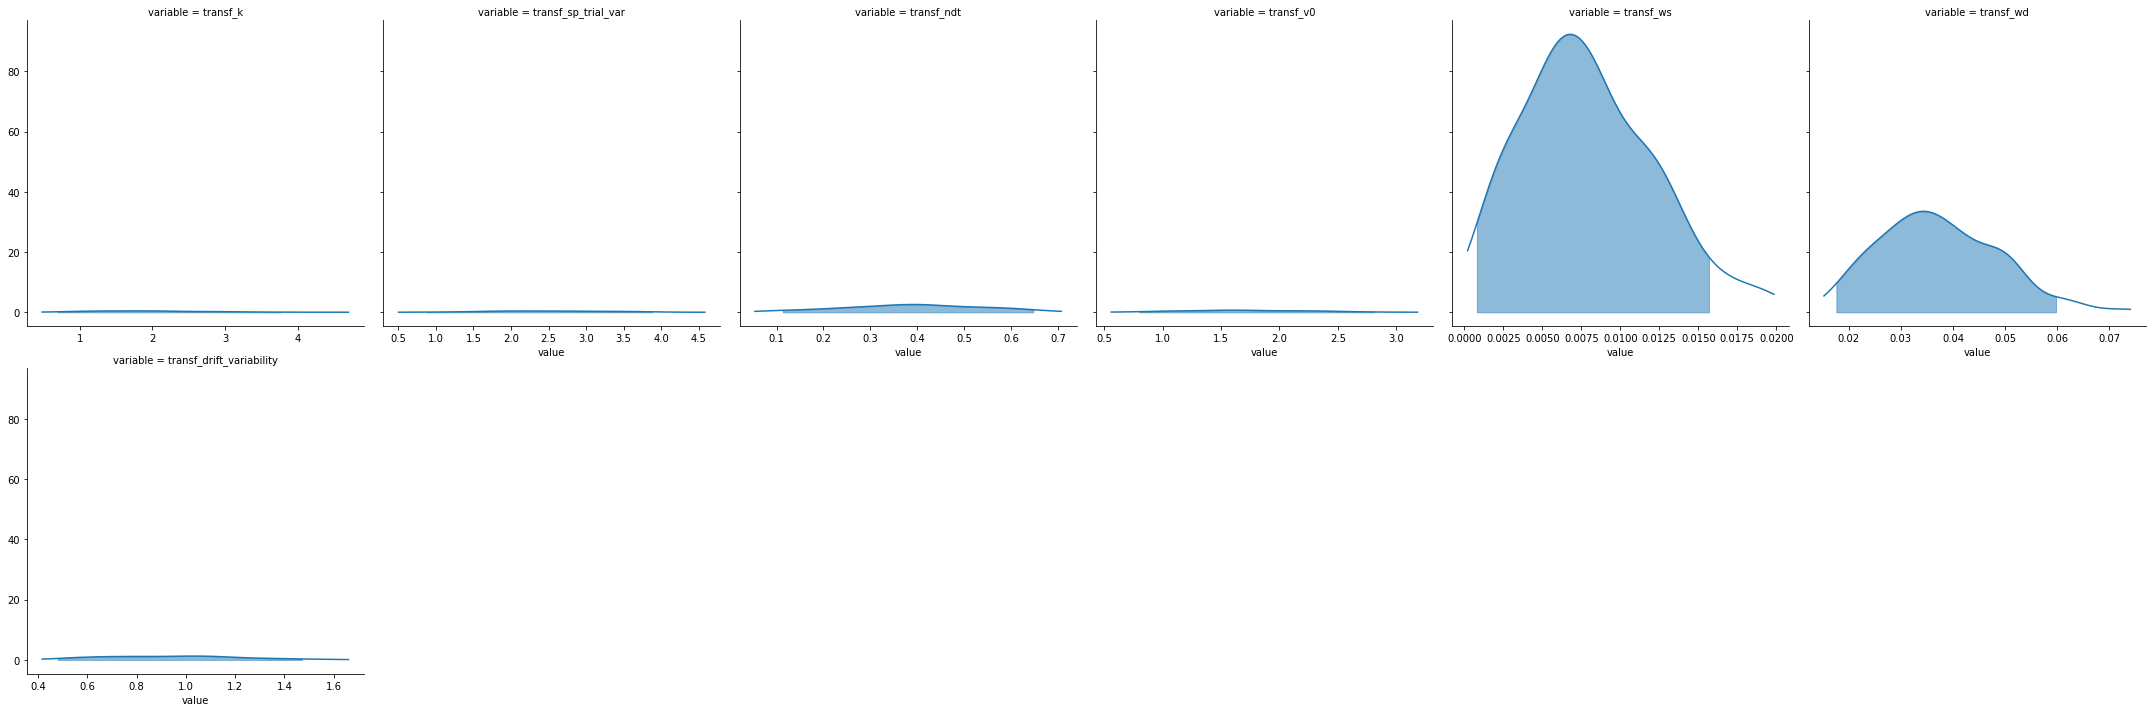

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[1.2938597 , 1.4942349 , 1.87214757, ..., 1.54353179, 1.23826735,
        1.76752006],
       [1.20751297, 1.17599524, 1.13768793, ..., 1.1676173 , 1.38874116,
        1.71322392],
       [1.11309052, 1.40140303, 1.39859877, ..., 1.50836985, 1.29125919,
        1.63530759],
       ...,
       [1.3432007 , 1.04929284, 1.32729127, ..., 1.75616742, 1.4288825 ,
        1.28457797],
       [1.03279557, 0.93545993, 1.03711553, ..., 1.65098988, 1.97598219,
        1.44253712],
       [1.44469891, 1.12821105, 1.27351689, ..., 1.17692432, 1.40295552,
        1.30272492]])

In [14]:
pp_acc

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.719665,1.521518,0.391371,1.263504,1.386473,1.532211,1.684145,1.881363,1.140162,1.285448,1.449343,1.689488,1.983041
2,0.719665,1.480497,0.325652,1.247849,1.405229,1.539956,1.635625,1.990123,1.109059,1.267120,1.431151,1.603402,1.779244
3,0.656904,1.504931,0.378620,1.190358,1.400411,1.535904,1.736372,1.904365,1.111175,1.275429,1.423100,1.630184,1.854893
4,0.803347,1.498301,0.006185,1.409219,1.490112,1.568243,1.636630,1.780035,1.276427,1.394771,1.491586,1.557068,1.680168
5,0.778243,1.521847,-0.020568,1.466227,1.527025,1.608912,1.678692,1.782826,1.282510,1.406792,1.497212,1.584554,1.711159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.677824,1.511055,0.259449,1.201769,1.348794,1.431962,1.646781,1.914265,1.095492,1.307134,1.484892,1.717882,1.944490
97,0.698745,1.571183,0.386204,1.319091,1.520394,1.648031,1.778922,1.950270,1.201966,1.326933,1.485751,1.661922,1.990468
98,0.665272,1.510144,0.342224,1.259339,1.356024,1.493978,1.611491,1.816873,1.159590,1.312099,1.481075,1.664684,1.903850


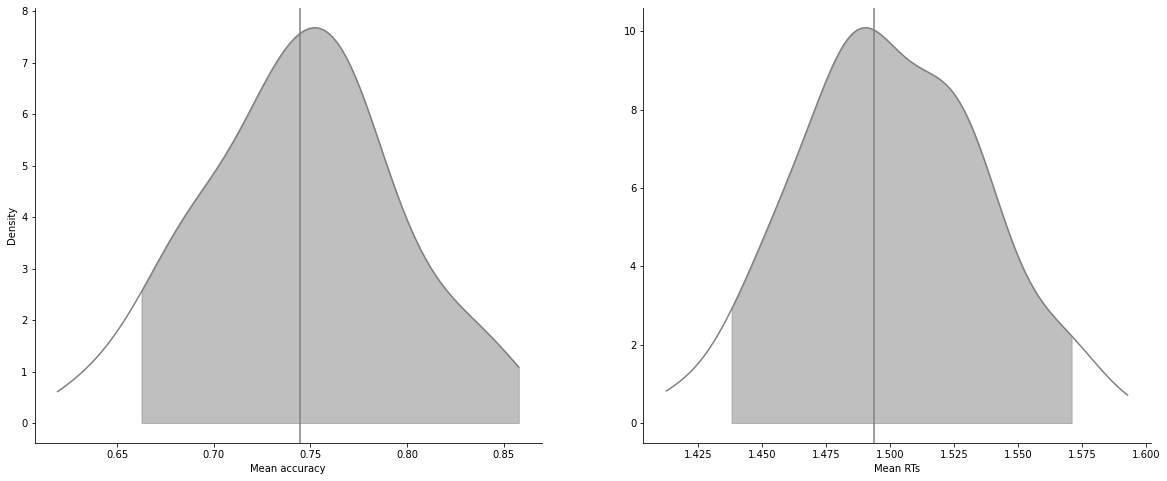

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

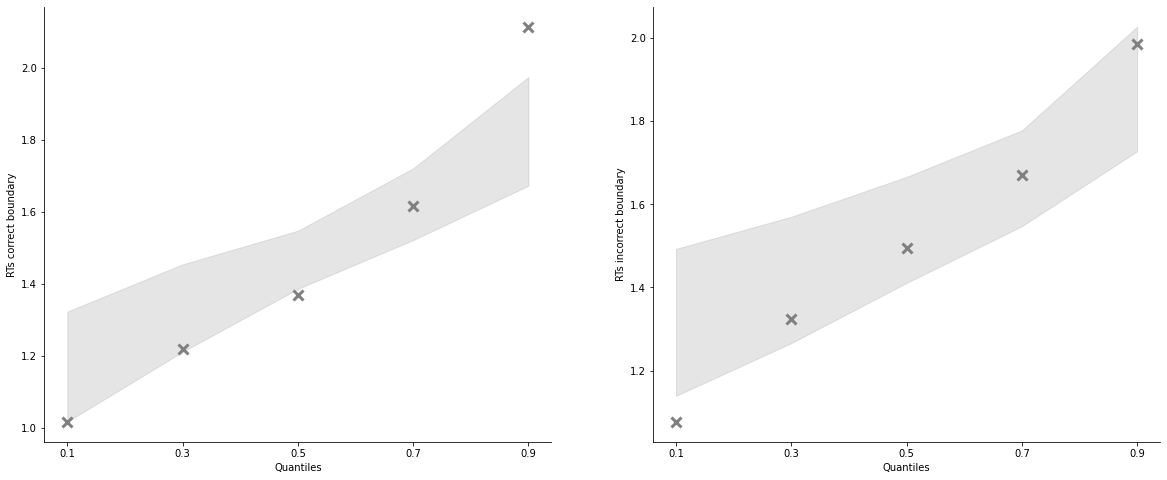

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc,accuracy_rescale,choice_pair,block_bins
0,0,10,1,1,61,52,4,3,1,1.285418,0,61,52,2,CD,1
1,1,10,1,2,54,37,4,2,1,1.577622,0,54,37,2,BD,1
2,2,10,1,3,51,51,4,3,2,1.564731,0,51,51,2,CD,1
3,3,10,1,4,50,35,3,1,2,1.217245,1,50,35,1,AC,1
4,4,10,1,5,59,50,4,2,3,1.929781,0,59,50,2,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'choice_pair'],
                                                    quantiles=[.3, .5, .7],
                                                    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.60  1.655344  0.368263   
                        2                0.65  1.552793  0.888730   
                        3                0.55  1.629112  0.396559   
                        4                0.70  1.549255 -0.186123   
                        5                0.80  1.607568  0.244551   
...                                       ...       ...       ...   
3           CD          96               0.70  1.387654  0.252620   
                        97               0.30  1.576701 -0.115052   
                        98               0.70  1.532838  0.104650   
                        99               0.50  1.419289 -0.118487   
                        100              0.60  1.478446  0.561327   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.647023             1.390528   
                        2                    1.425743             1.383205   
                        3                    1.391068             1.603546   
                        4                    1.388631             1.505664   
                        5                    1.475435             1.539706   
...                                               ...                  ...   
3           CD          96                   1.404745             1.278841   
                        97                   1.430675             1.588359   
                        98                   1.329151             1.447938   
                        99                   1.123979             1.420593   
                        100                  1.298679             1.278162   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.714927             1.524869   
                        2                    1.529197             1.453752   
                        3                    1.448226             1.744332   
                        4                    1.487093             1.628746   
                        5                    1.487603             1.584149   
...                                               ...                  ...   
3           CD          96                   1.433566             1.344448   
                        97                   1.550672             1.716865   
                        98                   1.538728             1.506703   
                        99                   1.344827             1.501090   
                        100                  1.436850             1.325338   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.806375             1.792982  
                        2                    1.700915             1.632851  
                        3                    1.667105             1.831968  
                        4                    1.610728             1.647719  
                        5                    1.518411             1.717616  
...                                               ...                  ...  
3           CD          96                   1.528827             1.434254  
                        97                   1.660912             1.823660  
                        98                   1.721189             1.652358  
                        99                   1.444699             1.600407  
                        100                  1.635244             1.647716  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_bins'],
                                                    quantiles=[.3, .5, .7],
                                                    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.866667  1.472969  0.420220               1.327071   
           2            0.800000  1.421251  0.938449               1.410763   
           3            0.800000  1.512586  0.073948               1.568341   
           4            0.766667  1.530249 -0.216152               1.519200   
           5            0.800000  1.494656 -0.019476               1.491284   
...                          ...       ...       ...                    ...   
8          96           0.793103  1.487392  0.232172               1.271672   
           97           0.724138  1.460748  0.693972               1.405652   
           98           0.689655  1.407571  0.405589               1.380154   
           99           0.827586  1.494635  0.410845               1.534925   
           100          0.517241  1.665442  0.047112               1.395330   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.256323               1.341695   
           2                  1.312216               1.459240   
           3                  1.217691               1.743775   
           4                  1.441970               1.598810   
           5                  1.381431               1.595908   
...                                ...                    ...   
8          96                 1.364546               1.461666   
           97                 1.276329               1.496240   
           98                 1.208751               1.393599   
           99                 1.208891               1.876692   
           100                1.588872               1.622509   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.473210               1.390107   
           2                  1.363835               1.488519   
           3                  1.349612               1.839869   
           4                  1.535741               1.624621   
           5                  1.422879               1.653118   
...                                ...                    ...   
8          96                 1.410664               1.694325   
           97                 1.412064               1.609871   
           98                 1.347167               1.460148   
           99                 1.333340               1.981749   
           100                1.693845               1.777190   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.626482  
           2                  1.463827  
           3                  1.764380  
           4                  1.594576  
           5                  1.553012  
...                                ...  
8          96                 1.661395  
           97                 1.515834  
           98                 1.517279  
           99                 1.662204  
           100                1.762283  

[800 rows x 9 columns]

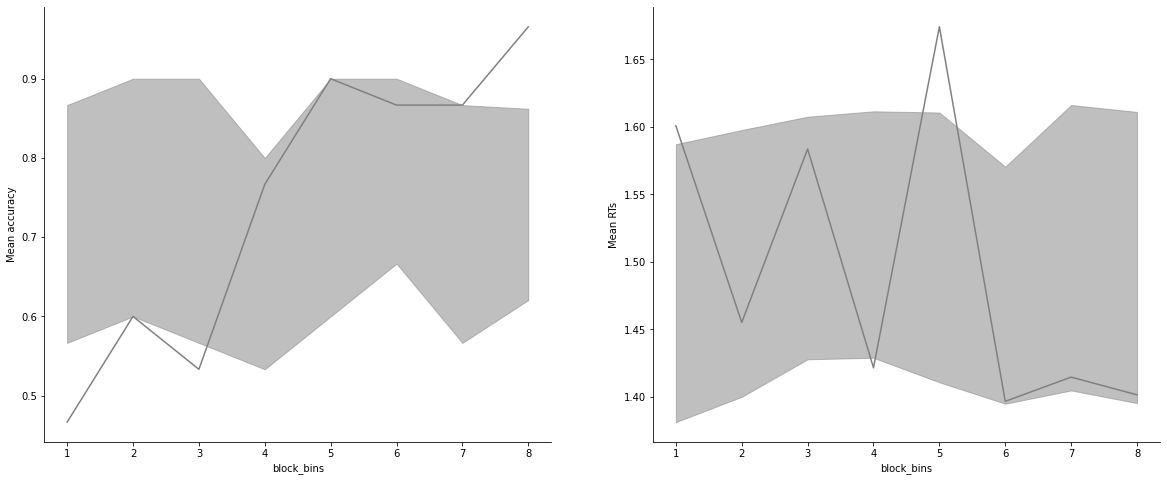

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

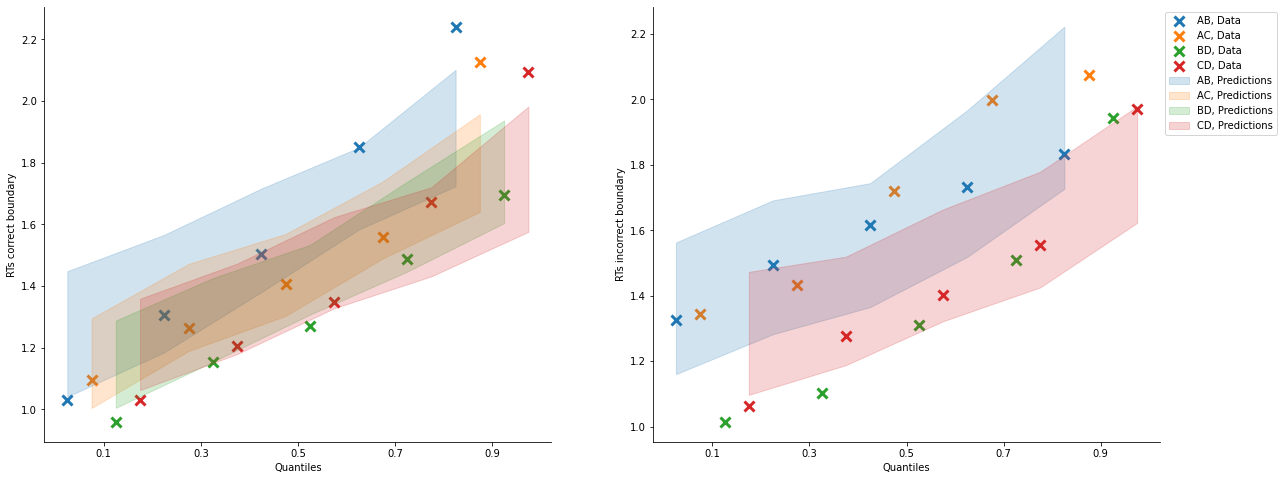

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                       grouping_var='choice_pair',
                                                       kind='shades',
                                                       quantiles=[.1, .3, .5, .7, .9]);